# Creating PLS models

In this session we'll try to make a PLS model using the octane dataset.  The principles are the same as what we've done throughout today.

Take it in small steps.  Initially don't worry about cross-validation and just try to get some code working with a fixed number of components.  Look at how the model changes as you change the number of components.

Find out how to look at the "components", called "loading vectors" in PLS jargon.  

Create score plots, like you did with PCA.

Then try using a cross validation tool to try and make a cross-validated model to choose an appropriate number of components to use in the predictive model.

PLSRegression is used like the other supervised learning models and is found in:

```
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

# and don't forget numpy, pandas and matplotlib
```

Use it like this for a given number of components:

```
model = PLSRegression(number_of_components)
model.fit(X_training_data, y_training_data)
```

You can cross validate in multiple ways.  This may be the simplest:

```
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
mse = []

for idx in np.arange(1, 20):
    model = PLSRegression(n_components= idx)
    error_score = model_selection.cross_val_score(model, X_training_data,
        y_training_data, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(error_score)
    
#plot the validation curve
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of components for 10-fold CV')
plt.ylabel('MSE')
plt.title ('PLS Cross-validation')
```



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

Import the dataset

In [2]:
octane_df = pd.read_excel('../data/octane.xlsx')

In [3]:
octane_df.head()

,Sample name,Octane number,1100,1102,1104,1106,1108,1110,1112,1114,...,1532,1534,1536,1538,1540,1542,1544,1546,1548,1550
0,M01,88.600006,-0.001835,-0.001496,-0.001009,-0.000360,0.000466,0.001502,0.002798,0.004410,...,0.040192,0.038423,0.036768,0.035235,0.033835,0.032575,0.031462,0.030508,0.029727,0.029127
1,M02,88.800003,-0.001627,-0.001261,-0.000748,-0.000065,0.000818,0.001943,0.003354,0.005088,...,0.041009,0.039185,0.037459,0.035842,0.034354,0.033023,0.031876,0.030927,0.030179,0.029622
2,M05,89.400002,-0.000465,-0.000330,0.000181,0.001121,0.002465,0.004140,0.006075,0.008238,...,0.044729,0.043308,0.041914,0.040548,0.039222,0.037938,0.036706,0.035545,0.034493,0.033604
3,L06,86.700005,-0.001443,-0.001094,-0.000596,0.000082,0.000972,0.002114,0.003545,0.005299,...,0.045022,0.043128,0.041327,0.039629,0.038052,0.036621,0.035361,0.034299,0.033446,0.032808
4,H11,91.199997,-0.001607,-0.001155,-0.000548,0.000244,0.001259,0.002551,0.004177,0.006188,...,0.038111,0.036470,0.034925,0.033475,0.032138,0.030943,0.029920,0.029091,0.028468,0.028044


Separate inputs and output

In [4]:
octane_ratings = octane_df['Octane number']
spectral_intensities  = octane_df.drop(columns=['Sample name', 'Octane number'])

Define and train the model

In [5]:
model = PLSRegression(n_components=1)

In [6]:
model.fit(spectral_intensities, octane_ratings)

PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

Look at the predictions

In [7]:
print(r"Model R square is", model.score(spectral_intensities, octane_ratings))

Model R square is 0.8699706738131808


In [8]:
octane_ratings_pred = model.predict(spectral_intensities)

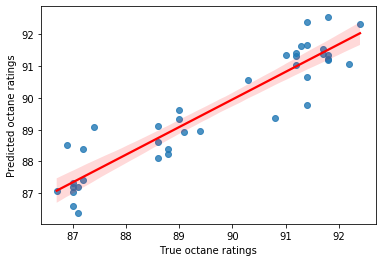

In [9]:
ax = sns.regplot(octane_ratings, octane_ratings_pred, line_kws={'color': 'red'})
plt.xlabel("True octane ratings")
plt.ylabel("Predicted octane ratings")
plt.show()

Look at the loading vectors

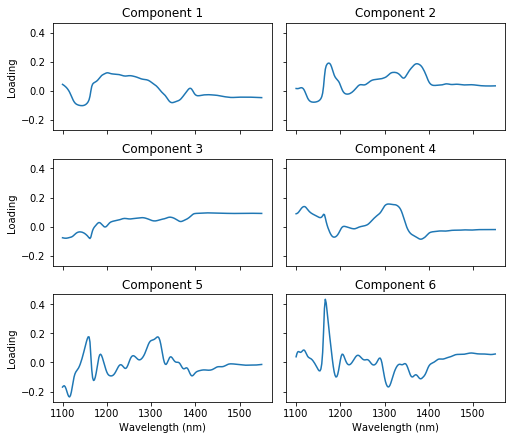

In [10]:
model = PLSRegression(n_components=6)
model.fit(spectral_intensities, octane_ratings)

wavelength = [int(s) for s in spectral_intensities.keys()]

fig, axs = plt.subplots(nrows=3,
                        ncols=2,
                        sharex=True,
                        sharey=True,
                        figsize=(7, 6),
                        constrained_layout=True)
for j in range(3):
    for i in range(2):   
        axs[j, i].plot(wavelength, model.x_loadings_[:, j*2 + i])
        axs[j, i].set_title("Component " + str(j*2 + i + 1))
    axs[j, 0].set_ylabel("Loading")
for i in range(2):
    axs[-1, i].set_xlabel("Wavelength (nm)")
plt.show()

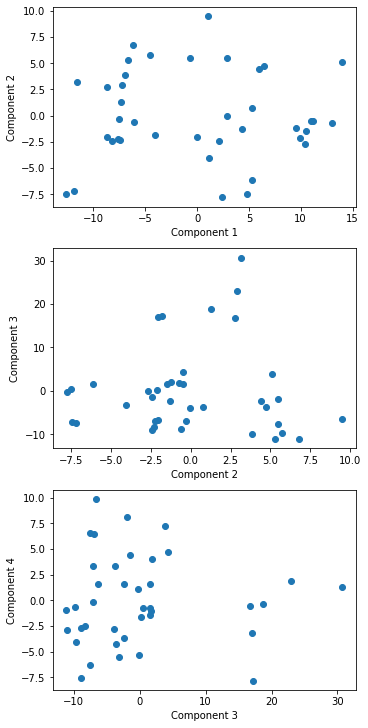

In [11]:
observations_pls_space = model.transform(spectral_intensities)

fig, axs = plt.subplots(nrows=3,
                        figsize=(5, 10),
                        constrained_layout=True)
for j in range(3):
    axs[j].scatter(observations_pls_space[:, j], observations_pls_space[:, j + 1])
    axs[j].set_xlabel('Component ' + str(j + 1))
    axs[j].set_ylabel('Component ' + str(j + 2))
plt.show()

Make a score plot

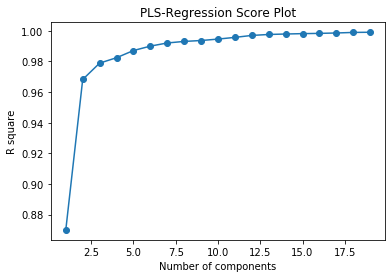

In [12]:
n_components = np.arange(1, 20)

scores = []
for n in n_components:
    model = PLSRegression(n_components=n)
    model.fit(spectral_intensities, octane_ratings)
    scores.append(model.score(spectral_intensities, octane_ratings))

plt.figure()
plt.plot(n_components, scores, '-o')
plt.xlabel('Number of components')
plt.ylabel('R square')
plt.title ('PLS-Regression Score Plot')
plt.show()

Validate the most adequate number of components

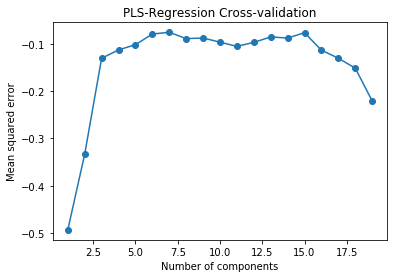

In [13]:
n_components = np.arange(1, 20)
cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.25, random_state=100)

mse = []
for n in n_components:
    model = PLSRegression(n_components=n)
    error_score = model_selection.cross_val_score(model,
                                                  spectral_intensities,
                                                  octane_ratings,
                                                  cv=cv,
                                                  scoring='neg_mean_squared_error').mean()
    mse.append(error_score)

# Plot the validation curve
plt.figure()
plt.plot(n_components, mse, '-o')
plt.xlabel('Number of components')
plt.ylabel('Mean squared error')
plt.title ('PLS-Regression Cross-validation')
plt.show()